## Final Project Submission

Please fill out: 
* Student name:  Mwangi Wambugu   
* Student pace: full time
* Scheduled project review date/time: 15/09/2023 12:00pm
* Instructor name: Nikita Ngoroge
* Blog post URL:


## Microsoft Entry into the Movie Space.



Importing Libraries

In [137]:
# Your code here - remember to use markdown cells for comments as well!
# The relevant imported files are here
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Connect to the sql 
conn = sqlite3.connect("zippedData/im.db")

def sqldata(query):
    return pd.read_sql(query, conn)

Load Data

In [138]:
# 
sqldata("SELECT * FROM sqlite_master;") 


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [139]:
persons = sqldata("SELECT * FROM persons")
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [140]:
basics = sqldata("SELECT* FROM movie_basics")  
basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [141]:
ratings = sqldata("SELECT* FROM movie_ratings")
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [142]:
budget = pd.read_csv("zippedData/bom.movie_gross.csv")
budget.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [143]:
movie_info = pd.read_csv("zippedData/tmdb.movies.csv", index_col= 0)
movie_info.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Data Cleaning
Cleaning for Basics

In [144]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [145]:
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [146]:
basics.isnull().any()

movie_id           False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

In [147]:
basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [148]:
null_count= basics.isnull().sum()
null_count

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [149]:
total_count = basics.shape[0]
total_count

146144

In [150]:
percentage = (null_count/total_count)*100
percentage

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [151]:
basics.dropna(subset=['original_title'], inplace = True)

In [152]:
basics.dropna(subset=['genres'], inplace = True)

In [153]:
basics['runtime_minutes'].fillna(basics['runtime_minutes'].mean(), inplace=True)

In [154]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [155]:
basics.duplicated().sum()

0

Cleaning for Ratings

In [156]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [157]:
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [158]:
ratings.isnull().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

In [159]:
ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [160]:
ratings.value_counts()

movie_id   averagerating  numvotes
tt0063540  7.0            77          1
tt4875844  7.3            758         1
tt4862468  3.6            323         1
tt4862190  8.2            117         1
tt4862056  8.3            14          1
                                     ..
tt2418510  6.3            310         1
tt2418480  8.3            55          1
tt2418440  6.3            4551        1
tt2418384  7.0            13          1
tt9916160  6.5            11          1
Length: 73856, dtype: int64

Cleaning Budget


In [161]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [162]:
budget.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [163]:
budget.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [164]:
null_count1 = budget.isnull().sum()
null_count1

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [165]:
total_count1 = budget.shape[0]
total_count1

3387

In [166]:
percentage1 =(null_count1/total_count1)*100
percentage1

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [167]:
budget.dropna(subset=['studio'], inplace = True)

In [168]:
budget.dropna(subset=['domestic_gross'], inplace = True)

In [169]:
# budget.dropna(subset = ["foreign_gross"])
budget.dropna(subset=['foreign_gross'], inplace = True)

              

In [170]:
budget.value_counts()

title                           studio    domestic_gross  foreign_gross  year
'71                             RAtt.     1300000.0       355000         2015    1
Solo: A Star Wars Story         BV        213800000.0     179200000      2018    1
Sparkle (2012)                  TriS      24400000.0      240000         2012    1
Space Dogs 3D                   EpicPics  14400.0         8300000        2012    1
Southside with You              RAtt.     6300000.0       208000         2016    1
                                                                                ..
Hubble 3D                       WB        52400000.0      21500000       2010    1
Howl                            Osci.     617000.0        566000         2010    1
How to be a Latin Lover         PNT       32100000.0      29700000       2017    1
How to Train Your Dragon 2      Fox       177000000.0     444500000      2014    1
xXx: The Return of Xander Cage  Par.      44900000.0      301200000      2017    1
Length: 2

In [171]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


Cleaning Movie_info

In [172]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [173]:
movie_info.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [174]:
movie_info.value_counts()

genre_ids     id      original_language  original_title                                popularity  release_date  title                                         vote_average  vote_count
[18, 53]      292086  en                 Come Morning                                  3.013       2012-10-21    Come Morning                                  6.3           5             3
[27, 53]      192023  en                 The Invoking                                  2.481       2013-03-16    The Invoking                                  4.1           14            3
[27]          514791  en                 Shhhh                                         0.600       2015-01-28    Shhhh                                         4.0           2             3
[99]          378425  en                 Here Come the Videofreex                      0.631       2015-06-21    Here Come the Videofreex                      8.0           1             3
              70758   en                 Hey, Boo: Harper Le

In [175]:
movie_info.isnull().any()

genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [176]:
basic_ratings = sqldata("""SELECT * FROM  movie_basics
                                LEFT JOIN  movie_ratings
                                USING (movie_id) """) 
basic_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [177]:
# genres_list = sorted(set(
#     genre.strip() for genres in basic_ratings["genres"] if genres is not None for genre in genres.split(",")
# ))
# basic_ratings['all_genres'] = basic_ratings['genres'].apply(lambda x: [genre.strip() for genre in x.split(",")] if x else [])
# basic_ratings


In [178]:
selected_columns = ['genres', 'averagerating']

# Use DataFrame indexing to select the desired columns
result = basic_ratings[selected_columns]
result

,genres,averagerating
0,"Action,Crime,Drama",7.0
1,"Biography,Drama",7.2
2,Drama,6.9
3,"Comedy,Drama",6.1
4,"Comedy,Drama,Fantasy",6.5
...,...,...
146139,Drama,NaN
146140,Documentary,NaN
146141,Comedy,NaN
146142,None,NaN


In [184]:
genres_list = sorted(set(
    genre.strip() for genres in result["genres"] if genres is not None for genre in genres.split(",")
))

# Modify the 'genres' column using .loc[] and apply
result.loc[:, 'genres'] = result['genres'].apply(lambda x: [genre.strip() for genre in x.split(",")] if x else [])

# Display the modified 'genres' column
print(result['genres'])

# You can also display the genres_list
results

AttributeError: 'list' object has no attribute 'split'

In [180]:
# genres_list = sorted(set(
#     genre.strip() for genres in result["genres"] if genres is not None for genre in genres.split(",")
# ))
# result.loc[:, 'genres'] = result['genres'].apply(lambda x: [genre.strip() for genre in x.split(",")] if x else [])


TypeError: cannot unpack non-iterable Axes object

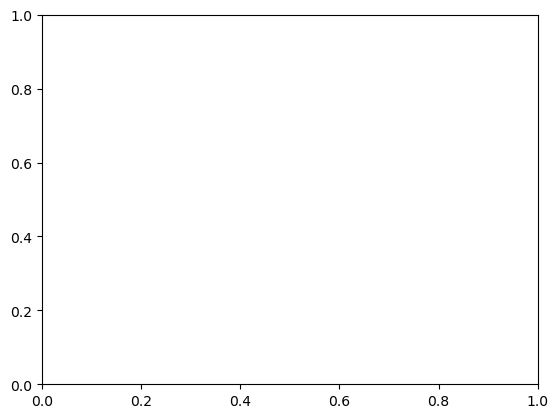

In [181]:
fig, ax = plt.subplot()
ax.bar(all_genres, averageratings)

# Label the axes and title
ax.set_xlabel("Genres")
ax.set_ylabel("Ratings")
ax.set_title("Genre Counts")

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=90)


plt.show()








In [182]:
budget.describe()

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


In [183]:
budget["foreign_gross"] = pd.to_numeric(budget["foreign_gross"], errors = "coerce")

budget["foreign_gross"].replace(np.nan, 0, inplace=True)
total_gross = budget["foreign_gross"] + budget["domestic_gross"]

budget.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


## Data Analysis